## Model-Based Learning

**By: Fernando E. Quintana**

Una de las tantas formas de categorizar los modelos de Machine Learning, es en base a como `GENERALIZAN` los datos. No es suficiente con tener una buena performance en el conjunto de datos de entrenamiento. El verdadero objetivo es tener una buena precisión en `NUEVAS INSTANCIAS`.

![](Imagen1.png)

### Model-Based Learning

Una de las tantas formas de generalizar desde un conjunto de ejemplos es construir un modelo sobre esos ejemplos, y luego usarlo para realizar predicciones.
Para ello vamos a seguir los siguientes pasos:
1. Observando la información gráfica intentaremos extraer conclusiones/tendencias
2. Con esa nueva data decidiremos seleccionar nuestro modelo de Machine Learning
3. Una vez creado el modelo, implementaremos medidas de performance.

Caso de Estudio *002FQ*: **Realizar un estudio sobre si el dinero hace feliz a las personas**

Fuentes y Datos:
1. PIB per capita (precios actuales en dólares), fuente: Fondo Monetario Internacional https://www.imf.org/external/pubs/ft/weo/2016/01/weodata/index.aspx
2. Indice de Satisfaccion de Vida: OECD https://stats.oecd.org/index.aspx?DataSetCode=BLI

Indice de Satisfacción de Vida (Life Satisfaction):

El indicador considera la evaluación de las personas de su vida como un todo. Es una suma ponderada de diferentes categorías de respuestas en una escala de 0 a 10, utilizando la Escala de Cantril (conocida también como el "esfuerzo de autoanclaje" Escala").

In [33]:
# Importamos librerias a utilizar:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import sklearn.linear_model
import seaborn as sns

In [64]:
# Cargamos el dataset:
pib_felicidad = pd.read_csv('PIB - Life Satisfaction.csv', thousands = ',')
pib_felicidad.set_index("Pais", inplace=True)

In [65]:
# Visualizamos el dataframe:
pib_felicidad

,"PIB per capita, precios actuales (dolares)",Indice Satisfaccion
Pais,,
Alemania,40996.51,7.0
Australia,50961.87,7.3
Austria,43724.03,7.1
Belgica,40106.63,6.9
Canada,43331.96,7.4
Chile,13340.91,6.5
Republica Checa,17256.92,6.7
Dinamarca,52114.17,7.6
Estonia,17288.08,5.7


In [66]:
# Preparamos los datos:
x = pib_felicidad['PIB per capita, precios actuales (dolares)']
y = pib_felicidad['Indice Satisfaccion']

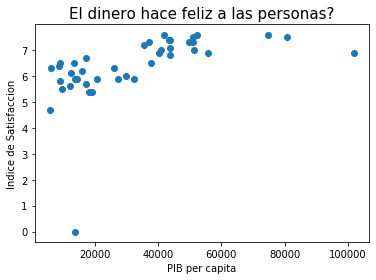

In [67]:
# Visualizamos la información:
pib_felicidad_plot, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('PIB per capita', fontsize=10)
ax.set_ylabel('Indice de Satisfaccion', fontsize=10)
ax.set_title('El dinero hace feliz a las personas?', fontsize=15)
plt.show()

*Conclusión 1: Pareciera ser a simple vista que la satisfacción de las personas creciera en relación al crecimiento del PIB per cápita por país, de una forma mas o menos lineal. Por lo tanto podemos inferir que el Indice de Satisfacción es una función lineal del PIB per capita.*

### Seleccionamos el modelo: Regresion Lineal con una sola variable

$$Indice\: de\: Satisfaccion = \theta_0 + \theta_1 * PIB\: per\: capita$$

Como vemos este modelo tiene dos parámetros, $$\theta_0, \theta_1$$

**Al ajustar estos parámetros podemos hacer que el modelo represente cualquier funcion lineal.**

Lo que debemos resolver antes de crear el modelo, son los valores los parámetros. Para saber que valores calcular para que el modelo funcione correctamente, tenemos que especificar lo que se conoce como `Medida de Rendimiento`. 
En este punto tenemos dos caminos:
1. Definir una `Funcion Utilidad`, la cual nos medirá que tan 'bueno' es nuestro modelo,
2. Definir una `Funcion Costo`, que medirá que tan 'malo' es. 

Para problemas de Regresión Lineal usualmente es utilizada una *función costo* que mide la distancia entre las predicciones del modelo lineal y los ejemplos de entrenamiento. 
**El objetivo es minimizar esa distancia**.

**Entrenamiento del Modelo:** en este punto es donde el algoritmo de `Regresion Lineal` entra en funcionamiento: alimenta el algoritmo con los datos de entrenamiento y encuentra los parámetros que hacen que el modelo lineal se ajuste mejor a los datos. Esto es *entrenar el modelo*.

In [68]:
# Entrenamos el modelo
modelo = sklearn.linear_model.LinearRegression()

In [69]:
# ajustamos los parámetros mencionados:
Xsample = np.c_[pib_felicidad["PIB per capita, precios actuales (dolares)"]]
ysample = np.c_[pib_felicidad["Indice Satisfaccion"]]
modelo.fit(Xsample, ysample)
t0, t1 = modelo.intercept_[0], modelo.coef_[0][0]
t0, t1

(5.3839293447249394, 3.063220627232418e-05)

En nuestro caso, el algoritmo encontró que los parámetros más óptimos son:

$$\theta_0 = 5.38\: y\: \theta_1 = 3.06 \displaystyle * 10^{-5}$$

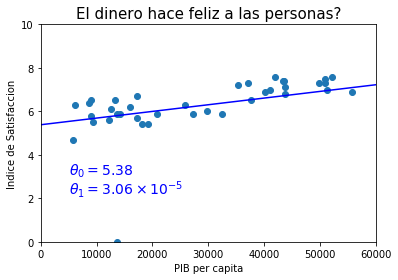

In [70]:
# Visualizamos la información:
pib_felicidad_plot, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('PIB per capita', fontsize=10)
ax.set_ylabel('Indice de Satisfaccion', fontsize=10)
ax.set_title('El dinero hace feliz a las personas?', fontsize=15)
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 5.38$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 3.06 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

**Conlusión 2:** Ahora el modelo se ajusta lo más psoible a los datos de entrenamiento como se puede ver en la figura 

### Poniendo el modelo en producción:

Vamos a tomar un país al azar para saber que tan feliz su población en relación al PIB per cápita, y no tenemos el dato en el dataset original de la OECD. 
Para ello utilizamos nuestro modelo recientemente creado. Como dijimos que el `Indice de Felicidad` estaba en relación al PIB per cápita, necesitaremos solo ese dato. 
Recurrimos a fuentes de confianza, en este caso usamos nuevamente los datos del FMI, y elegimos como país objetivo: `Argentina`:

PIB per cápita de Argentina (precios actuales en dólares): 13,588.846
Lo reemplazamos en la fórmula de nuestra `Regresion Lineal: Modelo`

$$5.38 + 13,588.84 * 3.06 * 10^{-5}$$

In [71]:
# Aplicamos el modelo a Argentina:
argentina_pib = pib_felicidad.loc["Argentina"]["PIB per capita, precios actuales (dolares)"]
print(argentina_pib)
argentina_prediccion = modelo.predict([[argentina_pib]])[0][0]
argentina_prediccion

13588.84


5.800185494606549

Obtenemos de esta manera el `Indice de Felicidad` para Argentina, que originalmente no se encontraba en el dataset provisto por la OECD, Resultando en la `escala Cantril` del 1 al 10: 5.80

$$5.38 + 13,588.84 * 3.06 * 10^{-5} = 5.80$$

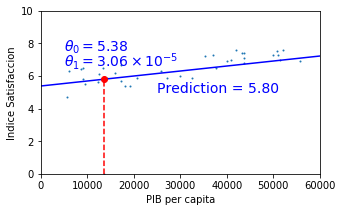

In [74]:
pib_felicidad.plot(kind='scatter', x="PIB per capita, precios actuales (dolares)", y='Indice Satisfaccion', figsize=(5,3), s=1)
plt.xlabel("PIB per capita")
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 5.38 $", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 3.06 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([argentina_pib, argentina_pib], [0, argentina_prediccion], "r--")
plt.text(25000, 5.0, r"Prediction = 5.80", fontsize=14, color="b")
plt.plot(argentina_pib, argentina_prediccion, "ro")
plt.show()

**Resumiendo:**
1. Estudiamos los datos
2. Seleccionamos el modelo
3. Lo entrenamos con el conjunto de datos de entrenamiento
4. Finalmente aplicamos el modelo para predecir nuevos casos esperando que el mismo generalice correctamente. Este concepto es conocido como `INFERENCIA`

### De esta manera concluimos nuestro `Model-Based Learning` para predecir si el Indice de Satisfacción de un país se relaciona con su ingreso per cápita. 


**By: Fernando E. Quintana**